# M2 PPF -- TP A2 -- Analyse spectrale des séries temporelles de mesures dans l'espace interplanétaire
------

## Introduction
------

L'analyse spectrale d'un signal consiste à exhiber ses fréquences caractéristiques grâce à la transformée de Fourier en représentant dans l'espace des fréquences sa *power spectral density* (PSD). Toutefois, comme nous le verrons, il est impossible de distinguer la répartition temporelle des différents modes, contenue dans les phases. Pour récupérer cette information, nous allons utiliser une transformée en ondelettes.
Cela nous permettra notamment d'étudier des données spatiales comme les traversées de régions très différentes (ici, la traversée de la magnétosphère terrestre par la mission CLUSTER).

Au cours de cet TP, nous allons étudier tout d'abord la transformée de Fourier discrète et la transformée en ondelettees de Morlet sur des signaux synthétiques, et exhiber leurs différences, puis nous appliquerons ces méthodes à des données réelles. 

Ce compte-rendu a été réalisé grâce aux Jupyter Notebook, il vous est donc possible de récupérer ses fichiers dans le [dépôt GitHub](https://github.com/gbogopolsky/spectral-analysis-astro "spectral-analysis-astro by gbogopolsky on GitHub") et de l'éxecuter sur votre machine. 

## Eléments théoriques
------
Tout d'abord, définissons les outils mathématiques que nous allons utiliser dans cette partie.
### La transformée de Fourier discrète

Tout d'abord, définissons la transformée de Fourier discrète (DFT, *discrete Fourier transform*). Soit une série temporelle $u[j] = u(t_{j})$ avec $t_{j} = j\Delta t = j T/N$ où $T$ est le temps d'enregistrement, $N$ le nombre de mesures et $j = 0,1, \ldots ,N-1$ l'indice des points de mesure temporelle. Nous allons décomposer ce signal sur un nombre fini des fréquences définies comme $f_{n} = n/T$ avec $n = 0,1,\ldots,N - 1$ l'indice des fréquences.

La DFT est alors définie comme suit :
$$ \hat{u}[n] = \frac{1}{N} \sum_{j=0}^{N-1}u[j] e^{-2 i \pi \frac{nj}{N}}$$

La transformée de Fourier inverse, c'est-à-dire l'opération qui à partir du spectre en fréquence reconstruit le signal temporel, est ainsi :
$$u[j] = \sum_{j=0}^{N-1} \hat{u}[n] e^{2 i \pi \frac{nj}{N}}$$

Une telle transformée a des propriétés intéressantes : pour un signal réel, il est possible de montrer que : 
$$ \hat{u}[N - n] = \hat{u}^*[n]$$
*Preuve :*
$$ \hat{u}[N - n] = \frac{1}{N} \sum_{j=0}^{N-1}u[j] e^{-2 i \pi \frac{(N-n)j}{N}} = \frac{1}{N} \sum_{j=0}^{N-1}u[j] e^{-2i \pi j} e^{2 i \pi \frac{nj}{N}} = \frac{1}{N} \sum_{j=0}^{N-1}u[j] e^{2 i \pi \frac{nj}{N}} = \hat{u}^*[n]$$

Nous pouvons aussi démontrer que cette transformation conserve l'énergie: :
$$ \sum_{n=0}^{N-1} \left| \hat{u}[n] \right| ^2  = \sum_{n=0}^{N-1} \hat{u}[n] \hat{u}[n]^* = \frac{1}{N^2} \sum_{n = 0}^{N-1} \left( \sum_{j=0}^{N-1} u[j] e^{-2i\pi \frac{nj}{N}} \right) \left( \sum_{k=0}^{N-1} u[k] e^{2i\pi \frac{nk}{N}} \right)$$
En séparant le produit de sommes en une somme de sommes, il vient : 
$$ \sum_{n=0}^{N-1} \left| \hat{u}[n] \right| ^2 = \frac{1}{N^2} \sum_{n = 0}^{N-1} \left( \sum_{\substack{j=0\\ k=0\\ j=k}}^{N-1} u[j] u[k] + \sum_{\substack{j=0\\ k=0\\ j\neq k}}^{N-1} u[j]u[k] e^{2i\pi \frac{n(k-j)}{N}} \right)$$
Inverser les sommations permet d'écrire :
$$ \sum_{n=0}^{N-1} \left| \hat{u}[n] \right| ^2 = \frac{1}{N^2} \sum_{j=0}^{N-1} u[j]^2 \sum_{n=0}^{N-1} 1 + \sum_{\substack{j=0\\ k=0\\ j\neq k}}^{N-1} u[j]u[k] \sum_{n=0}^{N-1} e^{2i\pi \frac{n(k-j)}{N}}$$
où l'on reconnaît la somme des racines de l'unité qui vaut zéro. D'où :
$$ \sum_{n=0}^{N-1} \left| \hat{u}[n] \right| ^2 = \frac{1}{N} \sum_{j=0}^{N-1} \left| u[j]\right|^2$$
C'est le théorème de Parseval-Plancherel.

Nous avons parlé plus haut de la PSD (*power spectral density*). Elle se définit : $S[n] = 2T \left| \hat{u}[n] \right|$ avec $n = 0,1, \ldots, N/2-1$, car la deuxième moitié du spectre est identique à la première (comme nous l'avons montré précédemment). $S[n]$ s'exprime en $\text{V}^2 ~\text{Hz}^{-1}$. Nous pouvons également réécrire le théorème de Plancherel avec la PSD : 
$$ \sum_{n=0}^{N-1} S[n] = \frac{2T}{N} \sum_{j=0}^{N-1} \left| u[j]\right|^2$$

### La transformée en ondelettes de Morlet

Soit l'ondelette de Morlet définit de la façon suivante par rapport au temps $t$ : 
$$ \psi_0 (t) = \pi^{-1/4} e^{-i \omega_0 t} e^{-t^2/2}$$
La dilatation et la translation de cette ondelette permet de définir par convolution la transformée en ondelettes : 
$$\mathcal{W}(\tau, t) = \sum_{j=0}^{N-1} u(t_j) \psi^*((t_j - t)/\tau)$$
avec $t_j$ la position autour de laquelle on effectue la convolution dans une fenêtre $\Delta t$, et $\tau$ un paramètre de dilatation temporelle ou échelle temporelle. Nous choisissons cette échelle de sorte qu'une relation simple existe avec les fréquences de Fourier : $1/f \simeq \tau$ en posant $\omega_0 = 6$.

Le carré du module du coefficient d'ondelette $\left| \mathcal{W}(\tau, t) \right|^2$ représentant le *quantum* d'énergie des fluctuations de $u(t)$ sur la surface $\Delta T \times \Delta \tau$ autour d'un moment $t$ à l'échelle $\tau$, nous pouvons tracer le scalogramme de la transformée sur un graphe à deux dimensions $(t,\tau)$.
Il est aussi possible de remonter à la puissance spectrale équivalente à la PSD via le spectre des fluctuations en intégrant sur la variable temporelle : 
$$S_w = 2 \delta t \mathcal{W}(f)^2 = \frac{2 \delta t}{N} \sum_{i=0}^{N-1} \left| \mathcal{W}(f, t_j) \right|^2$$

Vous trouverez plus de détails [ici](https://sites.lesia.obspm.fr/olga-alexandrova/files/2018/01/TP_M2_PPF_Alexandrova_Cecconi_2017_appendix.pdf "Enoncé").

Maintenant que nos transformées sont définies, nous allons les implémenter puis les mettre en applications sur des signaux synthétiques.

## Application à des signaux synthétiques
-------
### Transformée de Fourier

Nous implémentons les fonctions dans un fichier annexe [*function.py*](https://github.com/gbogopolsky/spectral-analysis-astro/blob/master/function.py "function.py"). La DFT est d'abord réalisée de façon intuitive avec des sommes : 
```python
def dft(data):
    """
    Discrete Fourier transform of real data.
    Input : Time serie of size N
    Output : Time serie of size N//2+1
    """
    N = len(data)
    output = np.zeros(N, dtype=complex)
    for n in range(N):
        for j in range(N):
            output[n] += data[j] * np.exp(-2 * np.pi * 1j * n * j / N)
    return output[:int(N/2) + 1] / N
```
Une fonction pour générer la liste des fréquences de Fourier est également pratique : 
```python
 def dftfreq(N, T):
     """
     Returns frequency coordinates for the DFT functions.
     Input: Size of the time series, and time step.
     Output: Frequency serie of size N//2+1
     """
     return np.arange(N//2 + 1) / T
```
Appliquons cette fonction aux signaux synthétiques $y_0(t)$, $y_1(t)$ et $y_2(t)$ définis également dans le même fichier : 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import function as fct
plt.rcParams['figure.figsize'] = (17,10)
plt.rcParams['font.size'] = 17
# Constants
N = int(1e3)
T = 10
dt = T/N
A0, f0 = 10, 0.5
A1, f1 = 8, 1

In [69]:
t = np.arange(N) * dt
y0, y1, y2 = fct.y0(t, A0, f0), fct.y1(t, A0, A1, f0, f1), fct.y2(t, A0, A1, f0, f1, T)
PSD0 = 2 * T * np.abs(fct.fdft(y0))**2
PSD1 = 2 * T * np.abs(fct.fdft(y1))**2
PSD2 = 2 * T * np.abs(fct.fdft(y2))**2
freq = fct.dftfreq(N, T)

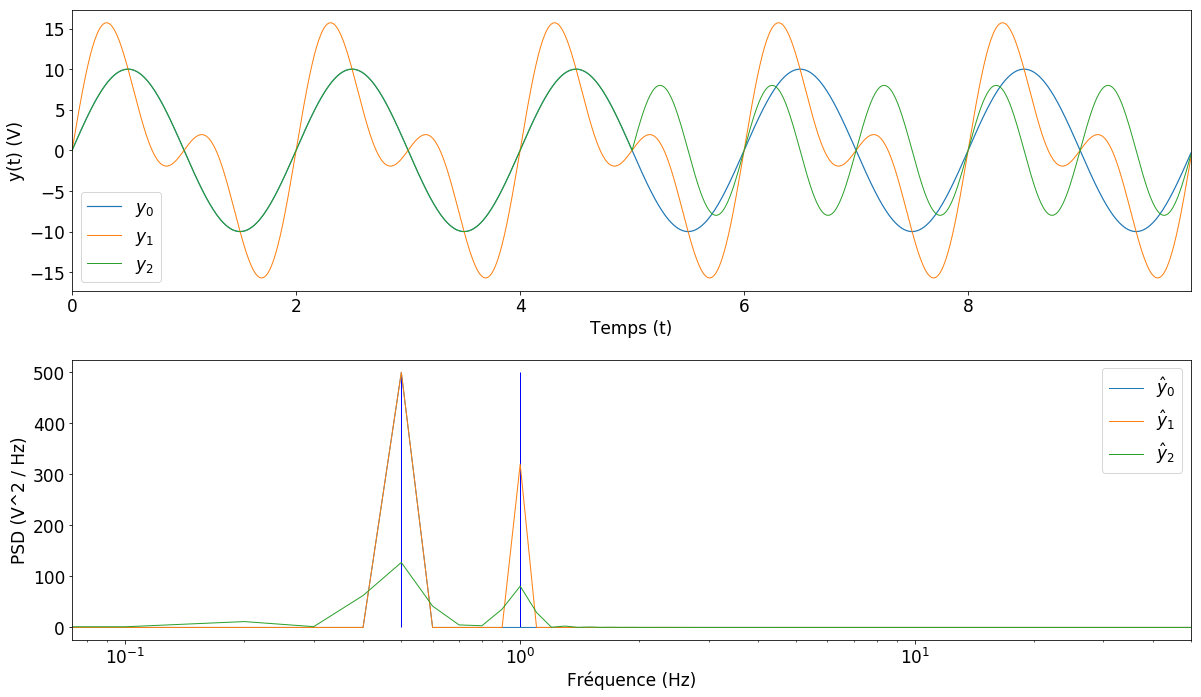

In [70]:
plt.subplot(211)
plt.plot(t, y0, linewidth=1.2, label=r'$y_0$')
plt.plot(t, y1, linewidth=1, label=r'$y_1$')
plt.plot(t, y2, linewidth=1, label=r'$y_2$')
plt.xlabel('Temps (t)')
plt.ylabel('y(t) (V)')
plt.xlim((np.min(t), np.max(t)))
plt.legend()

plt.subplot(212)
plt.semilogx(freq, PSD0, linewidth=1, label=r'$\hat{y}_0$')
plt.semilogx(freq, PSD1, linewidth=1, label=r'$\hat{y}_1$')
plt.semilogx(freq, PSD2, linewidth=1, label=r'$\hat{y}_2$')
plt.vlines((f0, f1), 0, 500, linewidth=1, color='blue')
plt.xlim((np.abs(np.min(freq)), np.max(freq)))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')
plt.legend()
plt.tight_layout()

Nous constatons tout d'abord que seule la moitié de la gamme de fréquence est couverte : en effet, la symétrie $ \hat{u}[N - n] = \hat{u}^*[n]$ nous confirme que ces deux moitiés sont identiques pour des données réelles. Il n'est donc pas nécessaire de conserver le reste. De plus, la fréquence maximale couverte est la fréquence de Nyquist, donnée par le théorème de Shannon-Nyquist : $f_{max} = f_{echant}/2 = 1/(2dt)$.

Nous observons bien les fréquences correspondantes à $f_0$ et $f_1$ sur les spectres, mais une chose est très claire : en ne se basant que sur la transformée de Fourier, il est impossible de distinguer les signaux $y_1$ et $y_2$, qui diffèrent par le déphasage entre les modes associés à ces deux fréquences. Cela sera possible avec transformée en ondelettes.

Nous avons également confirmé la précision de notre DFT à l'aide des transformées implémentées dans `numpy.fft` (cf. [TPA2-donnees-synthetiques.ipynb](http://nbviewer.jupyter.org/github/gbogopolsky/spectral-analysis-astro/blob/master/TPA2-donnees-synthetiques.ipynb?flush_cache=true "TPA2-donnees-synthetiques on nbviewer"), avec succès.

Par ailleurs, vous avez peut-être remarqué précédemment l'utilisation de la fonction `fdft` au lieu de `dft`. En effet, la DFT implémentée comme nous l'avons décrit est très lente à cause de l'utilisation des doubles boucles de Python. Afin d'optimiser la vitesse d'exécution, nous mettons à profit la vitesse des opérations matricielles codées en C du paquet Numpy en implémentant `fdft` de la manière suivante :
```python
def fdft(data):
    """
    Fast discrete Fourier transform of real data with Numpy and matrix operations.
    Input: Time serie of size N
    Output: Time serie of size N//2+1
    """
    N = len(data)
    exp = np.exp(-2 * np.pi * 1j / N * np.dot(np.arange(N)[:,np.newaxis], np.arange(N)[np.newaxis,:]))
    output = np.dot(data, exp) / N
    return output[:N//2+1]
```
L'optimisation n'est pas encore optimale (la sortie étant tronquée, la routine calcule deux fois trop de valeurs), mais elle nous permet tout de même d'augmenter la vitesse d'exécution un facteur 42 !!!

In [33]:
%%timeit
test = 2*T*np.abs(fct.dft(y0))**2

3.66 s ± 89.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit
test = 2*T*np.abs(fct.fdft(y0))**2

80 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Transformée en ondelettes de Morlet

Afin de réaliser la transformée en ondelettes, nous allons utiliser une routine développée par C. Torrence, G. Compo pour leur article et adaptée en Python par E. Predybaylo, trouvable sur leur [dépôt](https://github.com/chris-torrence/wavelets "wavelets by chris-torrence on GitHub").

In [35]:
import waveletFunctions as wav

Nous nous intéressons aux transformées des signaux $y_1$ et $y_2$, indiscernables par simple transformée de Fourier.

In [36]:
wave1, period1, scale1, coi1 = wav.wavelet(y1, dt)
wave2, period2, scale2, coi2 = wav.wavelet(y2, dt)

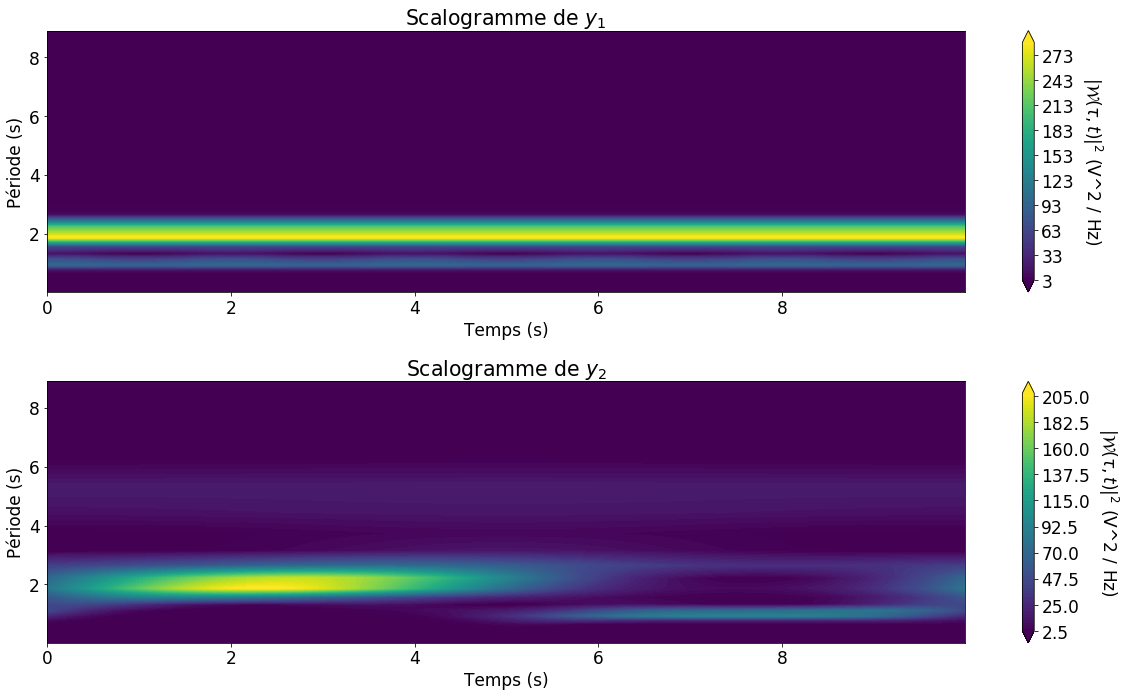

In [64]:
plt.subplot(211)
contour_plot = plt.contourf(t, period1, 2*dt*np.abs(wave1)**2, 100, extend='both')
plt.xlabel('Temps (s)')
plt.ylabel(r'Période (s)')
plt.title(r'Scalogramme de $y_{1}$')
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'$\left| \mathcal{W}(\tau,t)\right| ^{2}$ (V^2 / Hz)', rotation=270, labelpad=30)

plt.subplot(212)
contour_plot = plt.contourf(t, period2, 2*dt*np.abs(wave2)**2, 100, extend='both')
plt.xlabel('Temps (s)')
plt.ylabel(r'Période (s)')
plt.title(r'Scalogramme de $y_{2}$')
cbar = plt.colorbar(contour_plot)
cbar.set_label(r'$\left| \mathcal{W}(\tau,t)\right| ^{2}$ (V^2 / Hz)', rotation=270, labelpad=30)
plt.tight_layout()

Nous remarquons clairement la différence entre les deux signaux : dans le premier cas, les deux modes $f_0$ et $f_1$ existent sur toute la durée du signal, tandis que dans le deuxième cas, le mode $f_1 = 1.0$ Hz succède au mode $f_0 = 0.5$ Hz à partir de $T/2 = 5$ s.

In [53]:
print(1/f0, 1/f1)

2.0 1.0


Enfin, comparons pour le signal $y_1$ le spectre de Fourier et le spectre des wavelets : 

In [54]:
spWy1 = np.sum(np.abs(wave1)**2, axis=1)/wave1.shape[1]

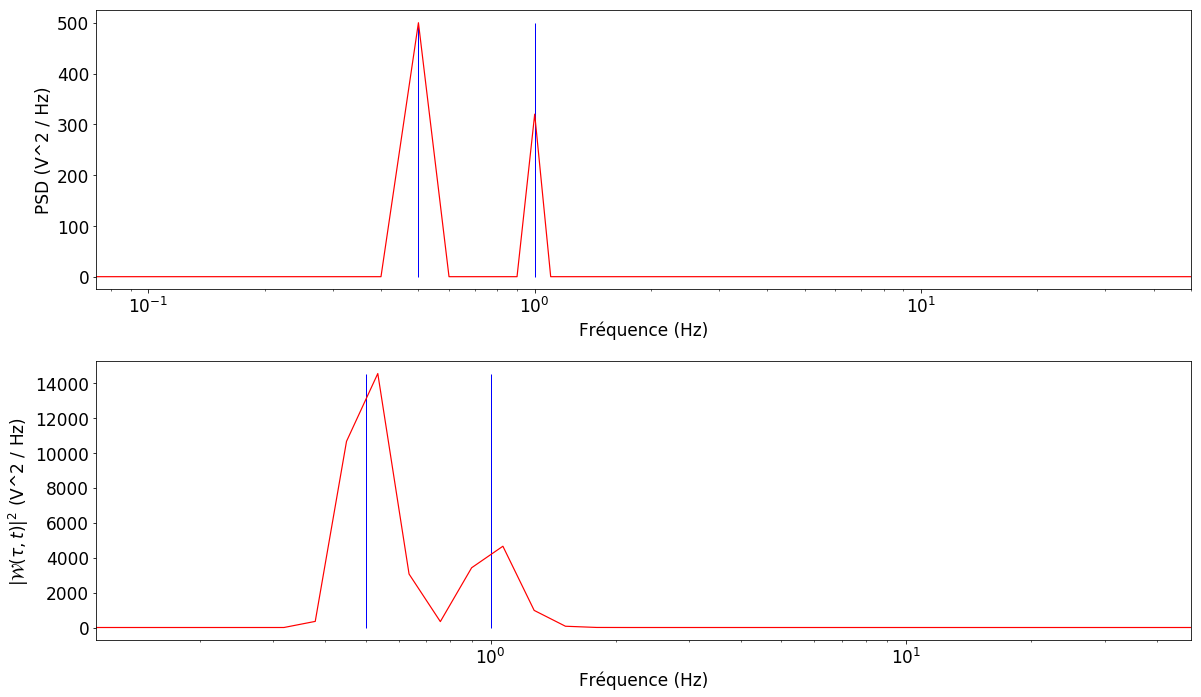

In [60]:
plt.subplot(211)
plt.semilogx(freq, PSD1, linewidth=1.2, color='red')
plt.xlim((np.abs(np.min(freq)), np.max(freq)))
plt.vlines([f0, f1], np.min(PSD1), np.max(PSD1), color='blue', linewidth=1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD (V^2 / Hz)')

plt.subplot(212)
plt.semilogx(1/period1, spWy1, linewidth=1.2, color='red')
plt.vlines([f0, f1], np.min(spWy1), np.max(spWy1), color='blue', linewidth=1)
plt.xlim(np.abs(np.min(1/period1)), np.max(1/period1))
plt.xlabel('Fréquence (Hz)')
plt.ylabel(r'$\left| \mathcal{W}(\tau,t)\right| ^{2}$ (V^2 / Hz)')
plt.tight_layout()

Nous constatons que le spectre en fréquence de Fourier est plus précis et défini en fréquence que le spectre des wavelets. Nous nous attendions à un tel résultats : en effet, afin de conserver la résolution temporelle, la transformée en ondelettes sacrifie de la résolution fréquentielle, ce que ne fait pas la transformée de Fourier. C'est la conséquence du principe d'incertitude de Heisenberg, qui relie la résolution en fréquence $\Delta f$ (ou en échelle temporelle $\Delta \tau = 1/\Delta f$) et la résolution temporelle $\Delta T$ : 
$$ \Delta f \Delta T \sim const.$$

Nous allons maintenant mettre en application ces transformations sur des signaux réels.

## Application à des signaux réels
------